Импортируем необходимые библиотеки

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Сделаем датасет с данными по школам

In [21]:
data_people = 'data/data_people.csv'
df = pd.read_csv(data_people, low_memory=False)

Удалим школы, в которых меньше 10 учащихся

In [22]:
df = df.groupby('Логин_ОО').filter(lambda x: len(x) >= 10)
df

,Number,Логин_ОО,Class,Sex,Rus,Math,ПБ,Family,District,Region,Salary,History Knowledge Index,Family Life Index,Culture Index
0,1904174,edu030331,6,Мальчики,4,5,10,Полная,Дальневосточный федеральный округ,Республика Бурятия,37297.2,2,2,2
1,2073399,edu030331,8,Девочки,4,4,12,Полная,Дальневосточный федеральный округ,Республика Бурятия,37297.2,2,3,2
2,2073406,edu030331,8,Девочки,5,4,6,Неполная,Дальневосточный федеральный округ,Республика Бурятия,37297.2,2,1,2
3,2073398,edu030331,8,Девочки,4,3,12,Полная,Дальневосточный федеральный округ,Республика Бурятия,37297.2,2,2,2
4,2120327,edu030331,8,Девочки,4,4,10,Многодетная полная,Дальневосточный федеральный округ,Республика Бурятия,37297.2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39425,2081261,edu893072,8,Девочки,4,4,7,Многодетная полная,Уральский федеральный округ,Ямало-Ненецкий автономный округ,100527.6,2,1,2
39426,2081265,edu893072,8,Мальчики,3,3,11,Неполная,Уральский федеральный округ,Ямало-Ненецкий автономный округ,100527.6,1,2,2
39427,2081246,edu893072,8,Мальчики,3,3,8,Полная,Уральский федеральный округ,Ямало-Ненецкий автономный округ,100527.6,2,2,2
39428,1921602,edu893072,6,Мальчики,4,4,8,Многодетная полная,Уральский федеральный округ,Ямало-Ненецкий автономный округ,100527.6,2,2,2


Посмотрим количество школ

In [23]:
schools_count = df['Логин_ОО'].nunique()
schools_count

443

Сделаем тепловую карту с количеством школ в регионах

In [24]:
unique_logins_per_district_region = df.groupby(
    ['District', 'Region']
)['Логин_ОО'].nunique().reset_index()

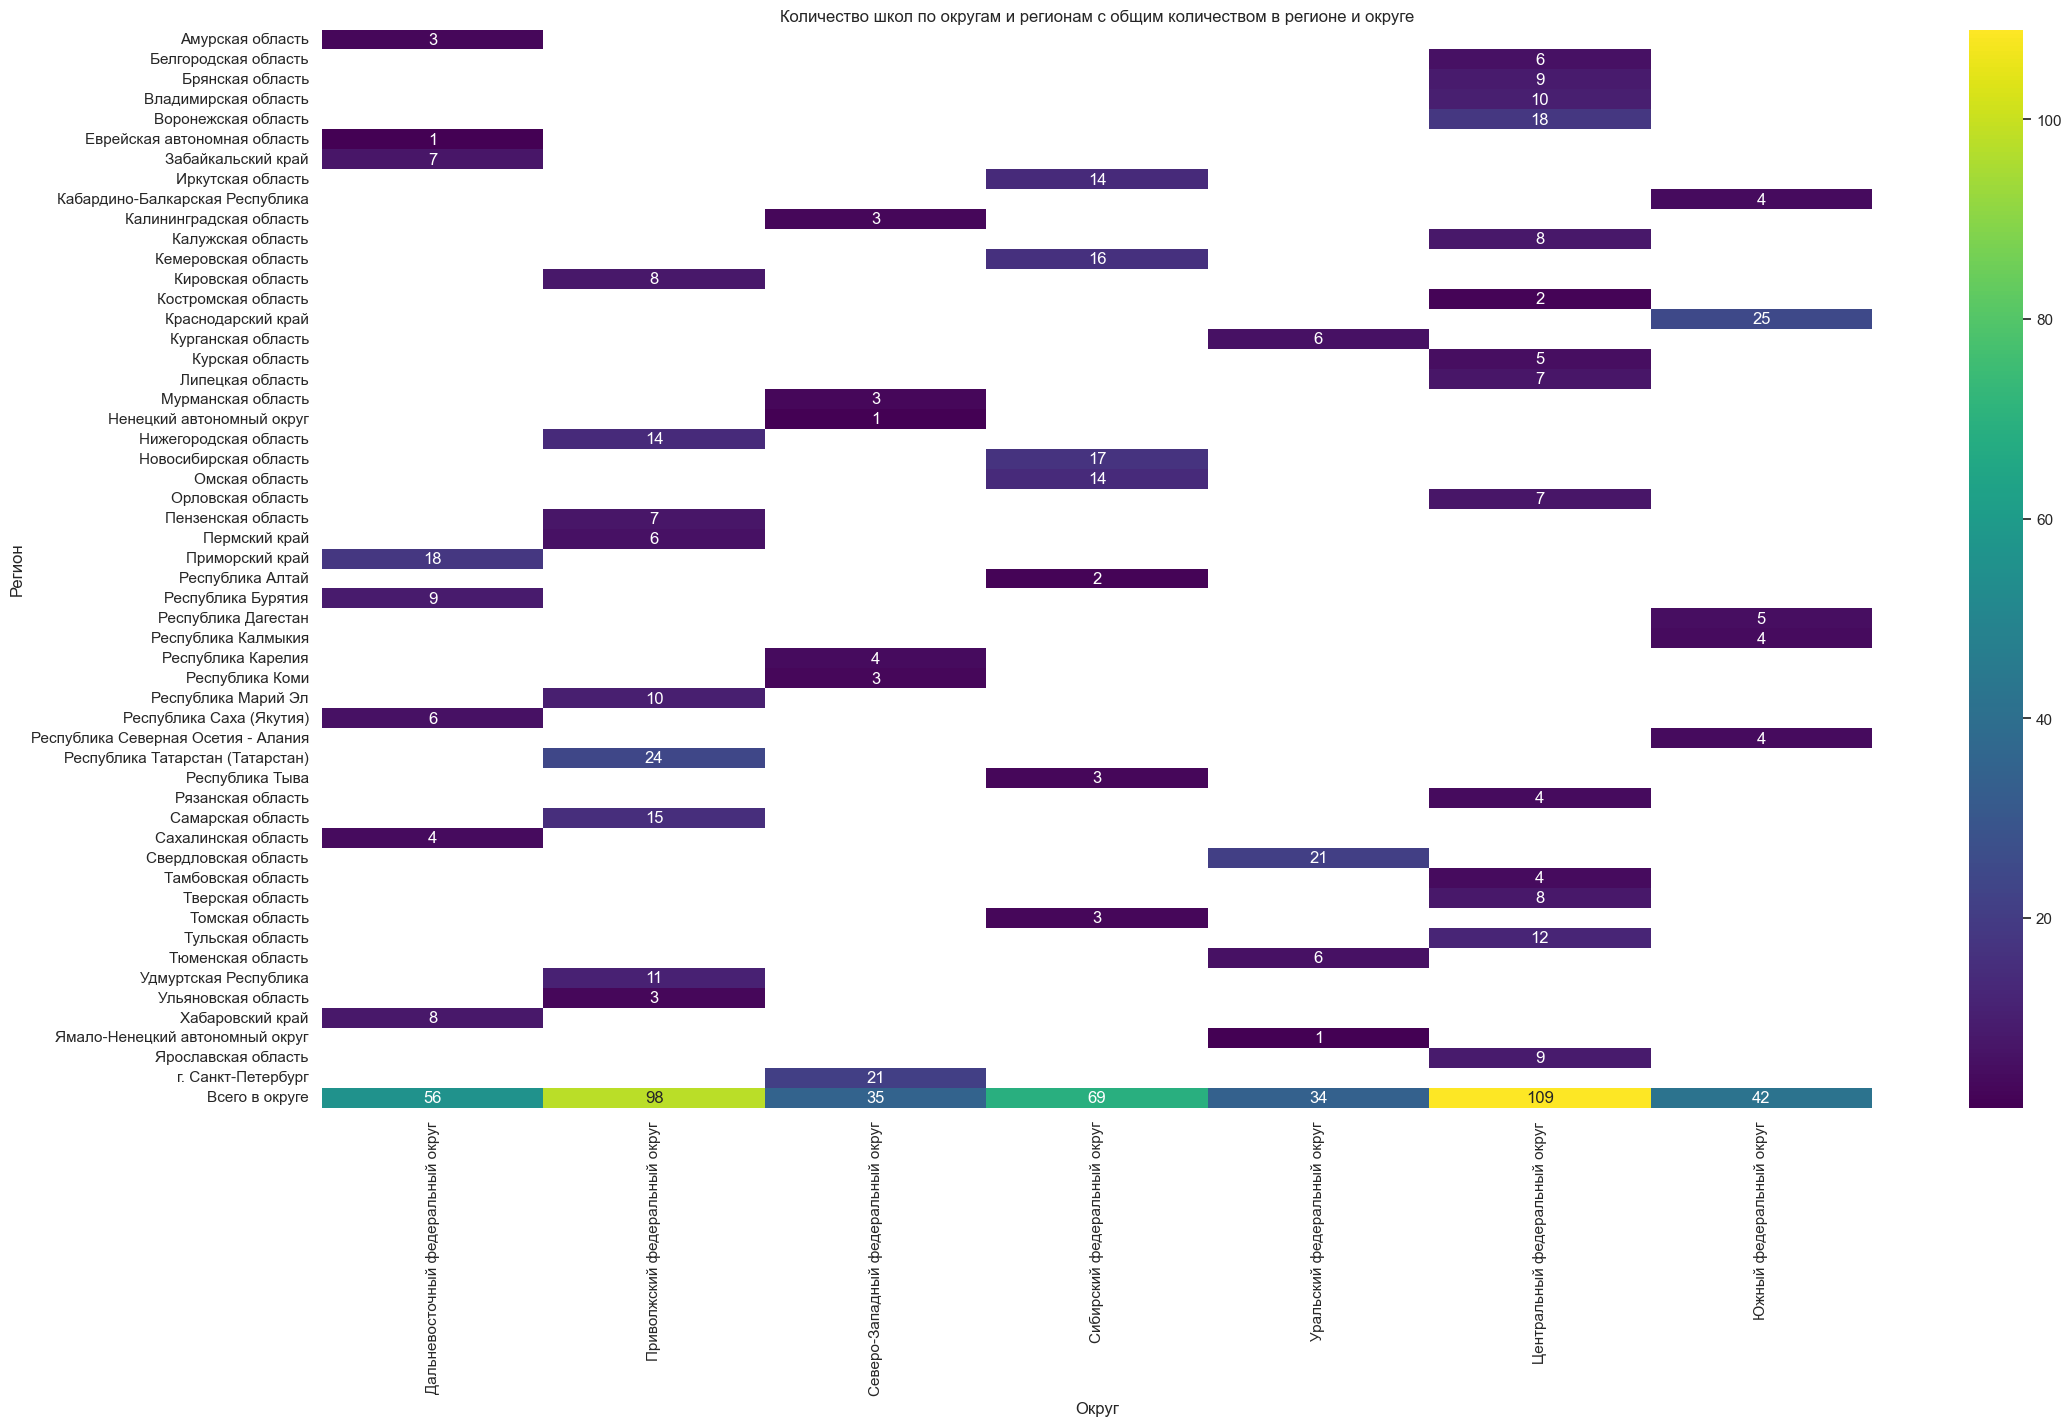

In [25]:
# Установка белого фона
sns.set(style="white")

pivot_table = unique_logins_per_district_region.pivot(
    index='Region', columns='District', values='Логин_ОО'
)

# Вычисляем сумму для каждого округа и добавляем как новую строку внизу
pivot_table.loc['Всего в округе'] = pivot_table.sum(axis=0)

# Создаем тепловую карту
plt.figure(figsize=(25, 14))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='viridis')

plt.title(
    'Количество школ по округам и регионам с общим количеством в регионе и округе'
)
plt.ylabel('Регион')
plt.xlabel('Округ')

plt.show()

Исключим неиспользуемые поля

In [26]:
df = df[
    [
     'Логин_ОО', 'Rus', 'Math', 'ПБ', 'Family', 
     'District', 'Region', 'Salary', 
     'History Knowledge Index', 'Family Life Index', 'Culture Index'
    ]
]

Характеризуем школы по оценкам (среднее)

In [27]:
average_marks_schools_df = df.copy()
average_marks_schools_df = average_marks_schools_df[
    ['Логин_ОО', 'Math', 'Rus', 'ПБ']
]

average_marks_schools_df = average_marks_schools_df.groupby('Логин_ОО').mean()

average_marks_schools_df


,Math,Rus,ПБ
Логин_ОО,,,
edu030331,3.727273,3.818182,8.500000
edu030343,3.578947,3.736842,11.894737
edu033025,4.237209,4.013953,9.516279
edu033029,3.460251,3.418410,9.066946
edu033057,3.550725,3.485507,8.659420
...,...,...,...
edu786049,3.750000,3.750000,7.916667
edu786089,3.903846,3.711538,9.730769
edu790001,3.632653,3.448980,8.969388


Характеризуем школы по индексам (среднее)

In [28]:
average_schools_df = df.copy()
average_schools_df = average_schools_df[
    ['Логин_ОО', 'History Knowledge Index', 'Family Life Index', 'Culture Index']
]
average_schools_df = average_schools_df.groupby('Логин_ОО').mean()
average_schools_df = average_schools_df.rename(columns={
    'History Knowledge Index': 'Average History Knowledge Index',
    'Family Life Index': 'Average Family Life Index',
    'Culture Index': 'Average Culture Index',
})
average_schools_df

,Average History Knowledge Index,Average Family Life Index,Average Culture Index
Логин_ОО,,,
edu030331,1.818182,1.636364,1.909091
edu030343,1.947368,1.842105,2.789474
edu033025,1.888372,1.953488,2.241860
edu033029,1.828452,1.891213,2.054393
edu033057,1.862319,1.855072,1.992754
...,...,...,...
edu786049,1.833333,1.916667,2.000000
edu786089,2.076923,1.980769,2.230769
edu790001,1.857143,1.612245,2.030612


Характеризуем семью

In [29]:
family_schools_df = df.copy()
family_schools_df['Неполная'] = (
    (family_schools_df['Family'] == 'Неполная').astype(int)
)
family_schools_df['Полная'] = (
    (family_schools_df['Family'] == 'Полная').astype(int)
)
family_schools_df['Многодетная полная'] = (
    (family_schools_df['Family'] == 'Многодетная полная').astype(int)
)

grouped_family_df = family_schools_df.groupby('Логин_ОО').agg(
    {
        'Неполная': 'sum', 
        'Полная': 'sum', 
        'Многодетная полная': 'sum', 
        'Family': 'size'
    }
)
grouped_family_df['Отношение_неполных'] = (
        grouped_family_df['Неполная'] / grouped_family_df['Family']
)
grouped_family_df['Отношение_полных'] = (
        grouped_family_df['Полная'] / grouped_family_df['Family']
)
grouped_family_df['Отношение_многодетных_полных'] = (
        grouped_family_df['Многодетная полная'] / grouped_family_df['Family']
)
grouped_family_df.drop(
    columns=['Неполная', 'Полная', 'Многодетная полная', 'Family'], 
    inplace=True
)

Объединим в один датасет полученные данные

In [30]:
df[['District', 'Region', 'Salary','Логин_ОО']].drop_duplicates()

,District,Region,Salary,Логин_ОО
0,Дальневосточный федеральный округ,Республика Бурятия,37297.2,edu030331
22,Дальневосточный федеральный округ,Республика Бурятия,37297.2,edu030343
41,Дальневосточный федеральный округ,Республика Бурятия,37297.2,edu033025
256,Дальневосточный федеральный округ,Республика Бурятия,37297.2,edu033029
495,Дальневосточный федеральный округ,Республика Бурятия,37297.2,edu033057
...,...,...,...,...
39078,Северо-Западный федеральный округ,г. Санкт-Петербург,59914.6,edu786049
39090,Северо-Западный федеральный округ,г. Санкт-Петербург,59914.6,edu786089
39142,Дальневосточный федеральный округ,Еврейская автономная область,37565.3,edu790001
39240,Северо-Западный федеральный округ,Ненецкий автономный округ,86870.0,edu833004


In [31]:
schools_df = average_schools_df.copy()
schools_df = pd.merge(
    schools_df, grouped_family_df, on='Логин_ОО', how='inner'
)
schools_df = pd.merge(
    schools_df, 
    df[['District', 'Region', 'Salary','Логин_ОО']].drop_duplicates(), 
    on='Логин_ОО', 
    how='inner'
)
schools_df = pd.merge(
    schools_df, average_marks_schools_df, on='Логин_ОО', how='inner'
)
new_order = [
    'Логин_ОО',
    'District', 'Region', 'Salary',
    'Average History Knowledge Index', 'Average Culture Index', 'Average Family Life Index',
    'Отношение_неполных', 'Отношение_полных', 'Отношение_многодетных_полных',
    'Rus', 'Math', 'ПБ'
]
schools_df = schools_df[new_order]


Посмотрим на результат

In [32]:
schools_df

,Логин_ОО,District,Region,Salary,Average History Knowledge Index,Average Culture Index,Average Family Life Index,Отношение_неполных,Отношение_полных,Отношение_многодетных_полных,Rus,Math,ПБ
0,edu030331,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.818182,1.909091,1.636364,0.090909,0.681818,0.227273,3.818182,3.727273,8.500000
1,edu030343,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.947368,2.789474,1.842105,0.368421,0.631579,0.000000,3.736842,3.578947,11.894737
2,edu033025,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.888372,2.241860,1.953488,0.120930,0.627907,0.251163,4.013953,4.237209,9.516279
3,edu033029,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.828452,2.054393,1.891213,0.175732,0.652720,0.171548,3.418410,3.460251,9.066946
4,edu033057,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.862319,1.992754,1.855072,0.253623,0.557971,0.188406,3.485507,3.550725,8.659420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,edu786049,Северо-Западный федеральный округ,г. Санкт-Петербург,59914.6,1.833333,2.000000,1.916667,0.000000,1.000000,0.000000,3.750000,3.750000,7.916667
439,edu786089,Северо-Западный федеральный округ,г. Санкт-Петербург,59914.6,2.076923,2.230769,1.980769,0.211538,0.711538,0.076923,3.711538,3.903846,9.730769
440,edu790001,Дальневосточный федеральный округ,Еврейская автономная область,37565.3,1.857143,2.030612,1.612245,0.275510,0.520408,0.204082,3.448980,3.632653,8.969388
441,edu833004,Северо-Западный федеральный округ,Ненецкий автономный округ,86870.0,1.884615,2.044872,1.788462,0.147436,0.641026,0.211538,3.801282,3.846154,9.141026


In [33]:
data = 'data/data_schools.csv'
schools_df.to_csv(data, index=False)